In [1]:
from datasets import load_dataset, load_from_disk
from transformers import AutoModelForSequenceClassification, DistilBertTokenizer
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = load_dataset("dariusbotusanu/ro_financial_phrasebank_v2")
tokenizer = DistilBertTokenizer.from_pretrained("racai/distilbert-base-romanian-cased", padding='max_length', max_length=45, truncation='max_length')

def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=45)

# Tokenize the datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_train = tokenized_datasets['train']
tokenized_eval = tokenized_datasets['test_all_agree']

In [4]:
fine_tuned_model = AutoModelForSequenceClassification.from_pretrained("./RoFinBert/model_directory/fine_tuned_model", num_labels=3)

In [5]:
def classify_sentences(model, tokenizer, sentences, labels=[0,1,2]):
    probabilities = list(map(lambda sentence: model(**tokenizer(sentence, return_tensors='pt'))[0].softmax(dim=-1).detach(), sentences))
    predictions = list(map(lambda x: labels[np.argmax(x)], probabilities))
    return predictions

In [6]:
eval_labels = tokenized_eval['label']
eval_predictions = classify_sentences(fine_tuned_model, tokenizer, tokenized_eval['text'])

train_labels = tokenized_train['label']
train_predictions = classify_sentences(fine_tuned_model, tokenizer, tokenized_train['text'])

In [7]:
cm_eval = confusion_matrix(eval_labels, eval_predictions)
cm_train = confusion_matrix(train_labels, train_predictions)

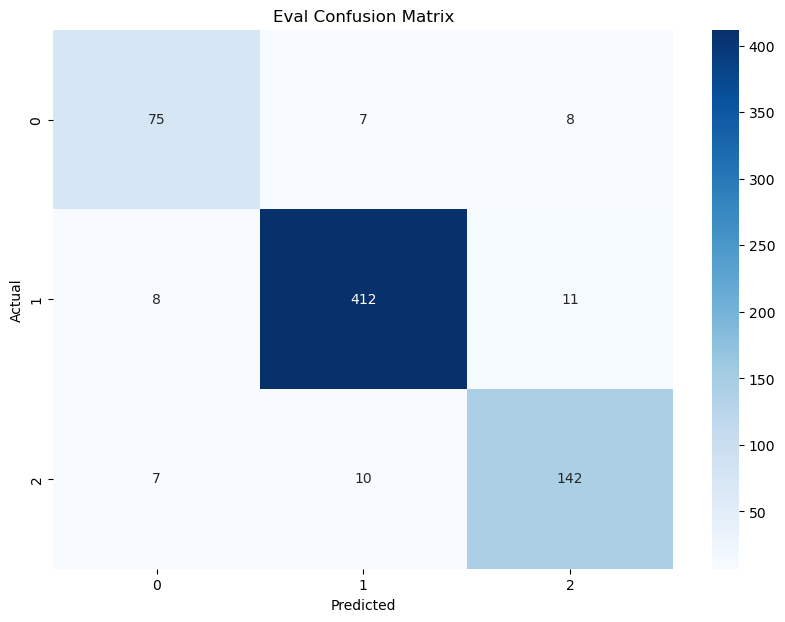

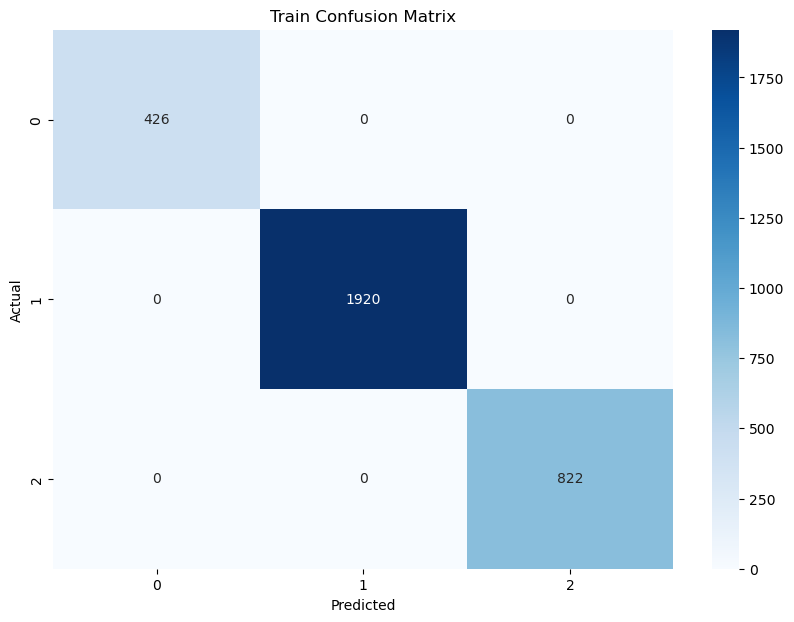

In [8]:
plt.figure(figsize=(10,7))

# Use seaborn to plot heatmap
sns.heatmap(cm_eval, annot=True, cmap='Blues', fmt='g')
plt.title('Eval Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

plt.figure(figsize=(10,7))

# Use seaborn to plot heatmap
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()